# 0. Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Base de dados

In [11]:
caminho = "data/informacao_nutricional.xls"

dados_nutricao = pd.read_excel(caminho)
dados_nutricao = dados_nutricao.drop("Alimento", axis=1)
dados_nutricao = dados_nutricao.replace('t', 0)
dados_nutricao


,Gramas,Calorias,Proteína,Fibra,Carboidrato
0,100.0,44.0,2.0,2.0,10.0
1,96.0,18.0,1.0,0.5,3.0
2,125.0,25.0,1.0,0.8,6.0
3,160.0,140.0,8.0,3.0,24.0
4,50.0,17.0,1.0,0.3,3.0
5,100.0,27.0,2.0,1.4,6.0
6,100.0,43.0,12.0,0.0,0.8
7,150.0,45.0,5.0,1.9,8.0
8,130.0,60.0,6.0,1.7,12.0
9,150.0,45.0,1.0,0.9,10.0


In [59]:
caminho_dados_csa = "data/csa_pindorama.xlsx"

def carrega_dados(caminho, aba, ignora_primeira_linha_coluna = False):
    if ignora_primeira_linha_coluna == True:
        dados_nutricao = pd.read_excel(caminho, sheet_name = aba, skiprows = [0])
        dados_nutricao = dados_nutricao.set_index("Unnamed: 0")
    else:
        dados_nutricao = pd.read_excel(caminho, sheet_name = aba)
        
    return dados_nutricao


dados_busca_cesta = carrega_dados(caminho_dados_csa, 'busca_cesta', True)
#dados_busca_cesta.index = ["carro_1", "carro_2"]
    
dados_busca_cesta

,29/mai,06/jun
Unnamed: 0,,
carro 1,Ana Beatriz,???
carro 2,Débora/Humberto,???


# 2. Tratamento dos dados

In [25]:
# tratamento efetuado

#dados_nutricao["Protein"] = dados_nutricao["Protein"].replace("-1","0", regex=True)
#dados_nutricao["Protein"] = dados_nutricao["Protein"].astype(float)

## dropar linhas erradas
#dados_nutricao.drop(205, inplace=True)
#dados_nutricao.drop(82, inplace=True)

## coluna calorias (Calories)
#dados_nutricao["Calories"] = dados_nutricao["Calories"].str.replace(",",".",regex=True)
## corrigindo as calorias das ervilhas
#dados_nutricao.loc[134, "Calories"] = '36.4'
## considerando o máximo da faixa de calories das alcachofras
#dados_nutricao.loc[91, "Calories"] = '44'
#dados_nutricao["Calories"] = dados_nutricao["Calories"].astype(float)

##coluna gordura (Fat)
#dados_nutricao["Fat"] = dados_nutricao["Fat"].astype(float)

## coluna gordura saturada (Sat.Fat)
## corrigindo a gordura saturada da carne de porco
#dados_nutricao.loc[42, "Sat.Fat"] = '18.6'
## corrigindo a gordura saturada da beterraba
#dados_nutricao.loc[100, "Sat.Fat"] = '0'
#dados_nutricao["Sat.Fat"] = dados_nutricao["Sat.Fat"].astype(float)

## coluna fibra (Fiber)
## corrigindo o valor da fibra do peixe "cavalinha" 
#dados_nutricao.loc[81, "Fiber"] = '0'
#dados_nutricao["Fiber"] = dados_nutricao["Fiber"].astype(float)

##coluna carboidrato (Carbs)
#dados_nutricao["Carbs"] = dados_nutricao["Carbs"].astype(float)

## dropar coluna "Measure" (a coluna gramas permite uma comparação melhor)
#dados_nutricao.drop("Measure", axis = 1, inplace=True)

#dados_nutricao.to_csv('data/csv_nutrientes_editado.csv',sep="|")

# 3. Gráfico comparativo

In [3]:
def grafico_comparativo(lista_alimentos, atributo):
    df = dados_nutricao.set_index('Alimento')
    df = df.loc[lista_alimentos]
    plt.figure(figsize = (8,6))
    plt.title(f"Comparação de {atributo}")
    sns.barplot(data = df, x = df.index, y = atributo)

SyntaxError: invalid syntax (<ipython-input-3-a841ce585ace>, line 4)

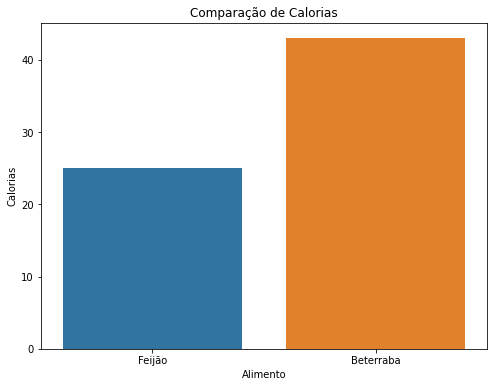

In [35]:
grafico_comparativo(["Feijão", "Beterraba"], "Calorias")

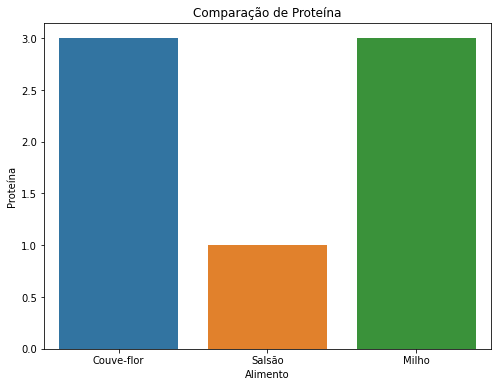

In [36]:
grafico_comparativo(["Couve-flor", "Salsão", "Milho"], "Proteína")

In [103]:
caminho_dados_csa = "data/csa_pindorama.xlsx"
dados_csa = pd.read_excel(caminho_dados_csa, engine='openpyxl',sheet_name='produtos')
dados_csa

,produto,na_terra,na_cesta
0,acerola,x,NaN
1,agrião,x,NaN
2,alecrim,x,NaN
3,alface crespa,x,x
4,alfavaca,x,NaN
5,alho poró,x,NaN
6,amora,x,NaN
7,azedinha,x,NaN
8,banana marmelo/figo/pão,x,NaN
9,banana nanica,x,NaN


In [108]:
dados_csa[dados_csa['na_terra'] != ''][0] = ' '
dados_csa.sort_values(by='produto')

,produto,na_terra,na_cesta
0,acerola,x,NaN
1,agrião,x,NaN
2,alecrim,x,NaN
3,alface crespa,x,x
4,alfavaca,x,NaN
5,alho poró,x,NaN
6,amora,x,NaN
7,azedinha,x,NaN
8,banana marmelo/figo/pão,x,NaN
9,banana nanica,x,NaN


In [106]:
df = dados_csa.copy()
df.index = [" "] * len(df)
df.loc[:,'na_terra'] = " "
df.loc[:,'na_cesta'] = " "
df.rename({'produto':'tabela','na_terra': '   ', 'na_cesta':' '}, axis='columns', inplace=True)
df[['tabela']]

,tabela
,acerola
,agrião
,alecrim
,alface crespa
,alfavaca
,alho poró
,amora
,azedinha
,banana marmelo/figo/pão
,banana nanica


In [ ]:
#dados_csa.set_index('produto')

In [46]:
#teste de acesso - base de dados no drive

#import requests
#import io
#import pandas as pd

#url_dados_csa = ' https://drive.google.com/file/d/1ZYFIPGIbQ52g1lKYHGhIGIBhT9ZMzB71/view?usp=sharing' https://drive.google.com/file/d/1ZYFIPGIbQ52g1lKYHGhIGIBhT9ZMzB71/view?usp=sharing
                                                  1ZYFIPGIbQ52g1lKYHGhIGIBhT9ZMzB7
#caminho_dados_csa = 'https://drive.google.com/uc?export=download&id='+url_dados_csa.split('/')[-2]
                                                                                               
#response = requests.get(caminho_dados_csa)



#for i in range (50):

#    url_dados_csa = ' https://drive.google.com/file/d/1ZYFIPGIbQ52g1lKYHGhIGIBhT9ZMzB71/view?usp=sharing'
#    caminho_dados_csa = 'https://drive.google.com/uc?export=download&id='+url_dados_csa.split('/')[-2]
    #dados_csa = pd.read_excel(caminho_dados_csa, engine='openpyxl')
    #print(dados_csa.head(1))
                                                                                               
#    response = requests.get(caminho_dados_csa)
#    print(response)
#print('fim')

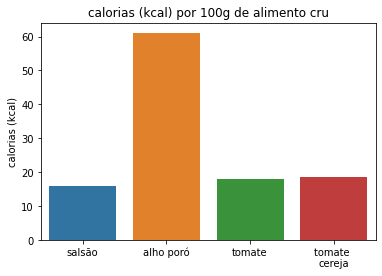

In [58]:
caminho_dados_csa = "data/csa_pindorama.xlsx"
dados_nutricao = pd.read_excel(caminho_dados_csa, engine='openpyxl',sheet_name='info_nutricional')

def grafico_comparativo(dados_nutricao, lista_alimentos, atributo):
    df = dados_nutricao.set_index('alimento')
    df = df.loc[lista_alimentos]
    
    
    #plt.figure(figsize = (8,6))
    
    figura, ax = plt.subplots()
    ax = sns.barplot(data = df, x = df.index, y = atributo)
    ax.set_title(f"{atributo} por 100g de alimento cru")
    ax.set(xlabel=None)
    
           
figura = grafico_comparativo(dados_nutricao,['salsão',dados_nutricao["alimento"].values[5], 'tomate', 'tomate \ncereja'], 'calorias (kcal)')

In [54]:
dados_nutricao["alimento"].values[-1]

'tomate \ncereja'

In [22]:
Lst = ['You can never understand one language until you understand at least two.',
       'Language is the blood of the soul into which thoughts run and out of which they grow.']
InsertNewlines = lambda lst, n=2: '\n'.join([' '.join(lst[i:i + n]) for i in range(0, len(lst), n)]) # n=words to keep together
out = [InsertNewlines(s.split()) for s in Lst]

In [28]:
print(out)

['You can\nnever understand\none language\nuntil you\nunderstand at\nleast two.', 'Language is\nthe blood\nof the\nsoul into\nwhich thoughts\nrun and\nout of\nwhich they\ngrow.']
